# <u> Module 4 Challenge </u>
## <i> Portfolio Quantitative Analysis </i>

In [196]:
#Module 4 Challenge
#Portfolio Quantitative Analysis

### Import libraries and dependencies

In [197]:
#Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline

### Set Files Paths and Read CSV as Dataframe

In [198]:
#Set the file paths 
whale_path = Path("Starter_Code/Resources/whale_returns.csv")
algo_path = Path("Starter_Code/Resources/algo_returns.csv")
sp_tsx_path = Path("Starter_Code/Resources/sp_tsx_history.csv")

#Read the .CSVs and set the 'date' column as a datetime index to the DataFrame
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_df = pd.read_csv(sp_tsx_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

### Clean Data and Drop NAN/NA & Null Values

In [199]:
#Clean data - Drop NA & Null Values 
whale_df = whale_df.dropna().copy()
algo_df = algo_df.dropna().copy()
sp_tsx_df = sp_tsx_df.dropna().copy()

sp_tsx_df['Close'] = sp_tsx_df['Close'].replace('\$|,', '', regex=True)
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype(float)

#Clean up dollar sign ($) ascii character(s) from second price column 
#sp_tsx_df['Close'] = sp_tsx_df['Close'].replace('$', '')
#sp_tsx_df

#test to see if 0/NAN data is removed; looks good so far
#whale_df.iloc[40:60,:]

### Calculate S&P TSX 60 Daily Returns

In [179]:
#Calculate daily returns from S&P TSX 60 CSV data table to prepare for concat with the other data tables
sp_tsx_df['Close'].dtypes

daily_returns_sp_tsx = sp_tsx_df.pct_change()
daily_returns_sp_tsx = daily_returns_sp_tsx.dropna().copy()

#Print sample of daily returns for the S&P TSX 60 dataframe
daily_returns_sp_tsx.head(5)

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


### Concatenate All Whale, Algo, and S&P TSX 60 DataFrames Into Singular Daily Returns Combined DataFrame

In [184]:
#Create a new Dataframe where the columns are the closing prices for each ticker
combined_df = pd.concat([whale_df, algo_df, daily_returns_sp_tsx], axis="columns", join="inner")
combined_df = combined_df.rename(columns={"Close":"S&P TSX 60"})
combined_df = combined_df.sort_index(ascending=True)
combined_df.head(4)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


### Plot of Daily Returns for All Portfolios

<AxesSubplot:title={'center':'Daily Returns of All Portfolios Across Time'}, xlabel='Date'>

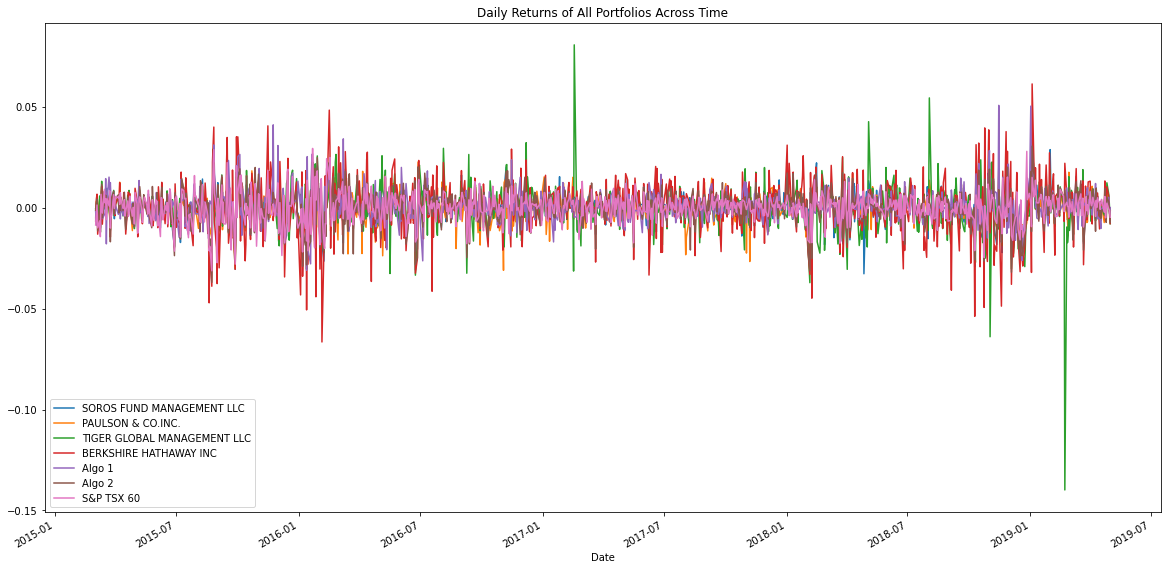

In [187]:
#Calculate and plot daily returns for all portfolios
combined_df.plot(figsize=(20,10), title="Daily Returns of All Portfolios Across Time")

### Calculate and Plot Cumulative Returns For All Portfolios Across Time

#### i.) 'Whale' Portfolio Cumulative Returns

<AxesSubplot:title={'center':'Whale Portfolio Cumulative Daily Returns'}, xlabel='Date'>

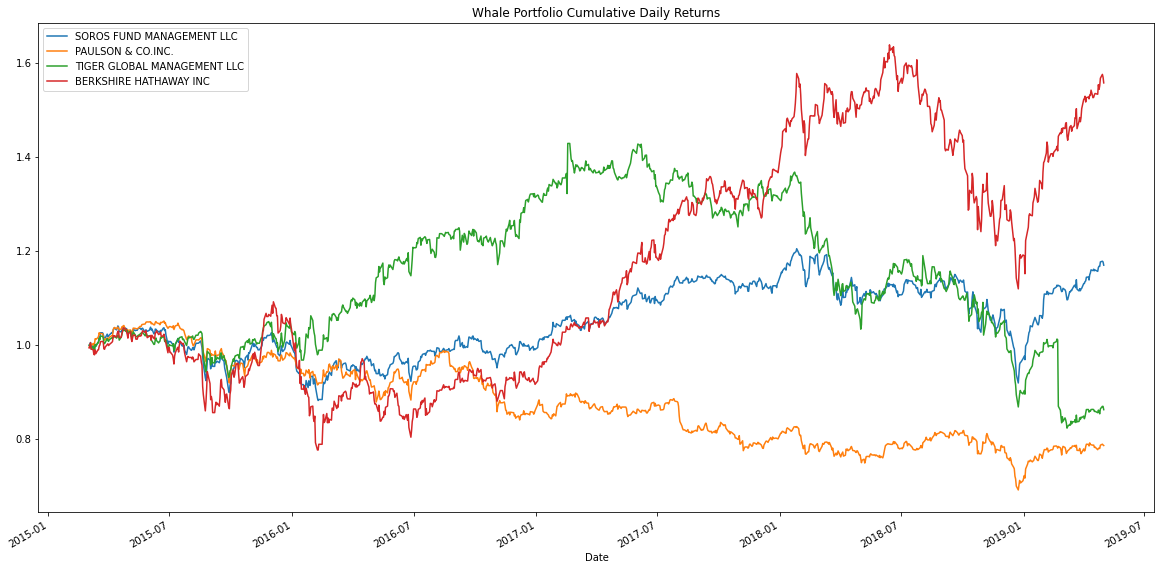

In [190]:
#Set initial investment
whale_initial_inv = 10000

#Use the 'cumprod' function to calculate the whale stock portfolio's cumulative returns
whale_cumulative_returns = (1 + whale_df).cumprod()
whale_cumulative_returns.plot(figsize=(20,10), title="Whale Portfolio Cumulative Daily Returns")

<AxesSubplot:title={'center':'Whale Portfolio Profits from Hypothetical $10k Initial Investmnet'}, xlabel='Date'>

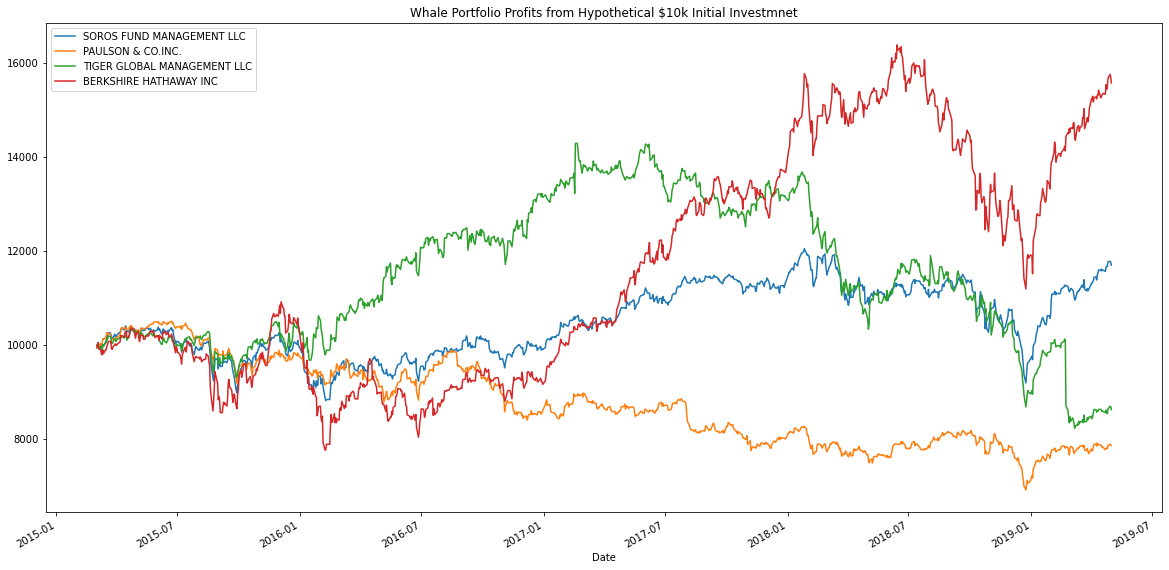

In [191]:
#Hypothetical Cumulative Daily Returns on Whale Portfolio's (Normalized to an Initial Investment of $10,000)
whale_cumulative_profits = (whale_initial_inv*whale_cumulative_returns)
whale_cumulative_profits.plot(figsize=(20,10), title="Whale Portfolio Profits from Hypothetical $10k Initial Investment")

#### ii.) Algo Portfolio Cumulative Returns

<AxesSubplot:title={'center':'Algo Portfolio Daily Returns'}, xlabel='Date'>

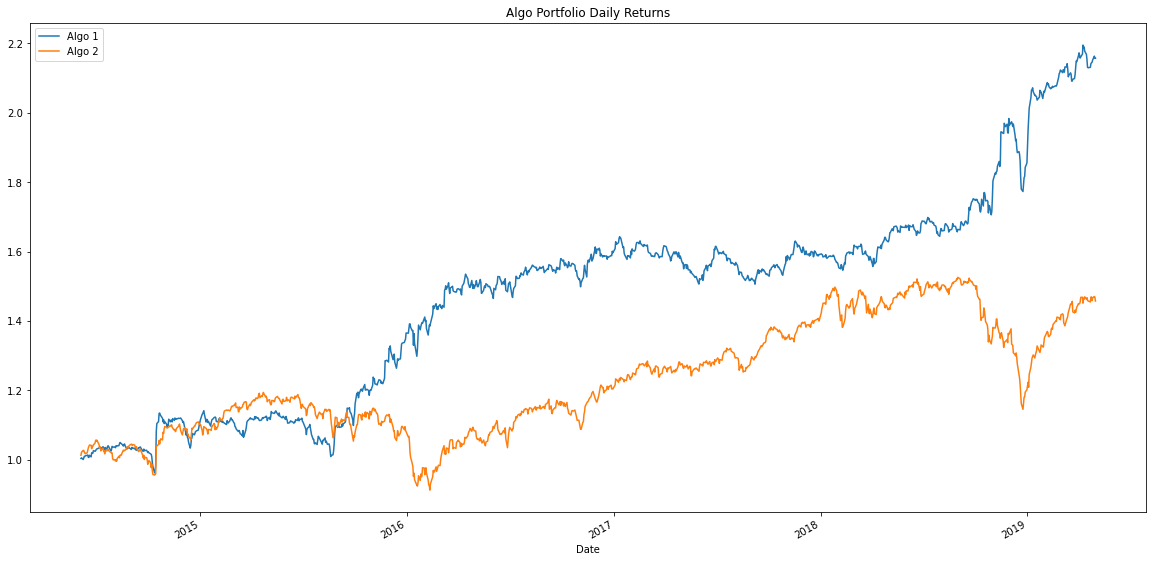

In [192]:
#Set initial investment 
algo_initial_inv = 10000

#Use the 'cumprod' function to calculate the algo portfolio's cumulative returns 
algo_cumulative_returns = (1 + algo_df).cumprod()
algo_cumulative_returns.plot(figsize=(20,10), title="Algo Portfolio Daily Returns")

<AxesSubplot:title={'center':'Algo Portfolio Profits from Hypothetical $10k Initial Investment'}, xlabel='Date'>

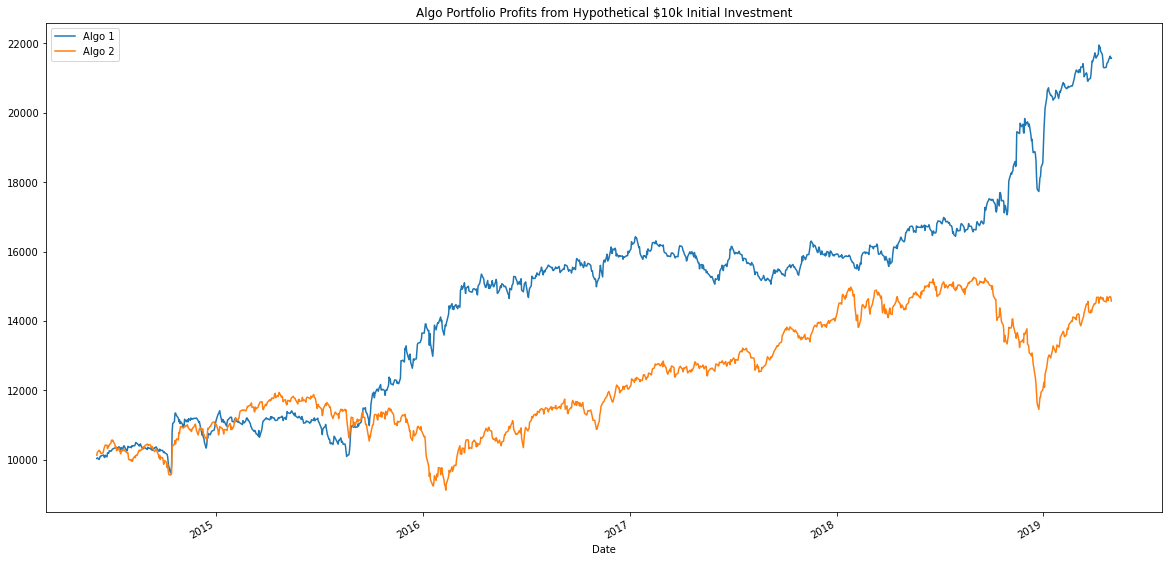

In [194]:
#Hypothetical Cumulative Daily Returns on Algo Portfolio's (Normalized to an Initial Investment of $10,000)
algo_cumulative_profits = (algo_initial_inv*algo_cumulative_returns)
algo_cumulative_profits.plot(figsize=(20,10), title="Algo Portfolio Profits from Hypothetical $10k Initial Investment")

### iii.) S&P TSX 60 Cumulative Returns

<AxesSubplot:title={'center':'S&P TSX 60 Cumulative Daily Returns'}, xlabel='Date'>

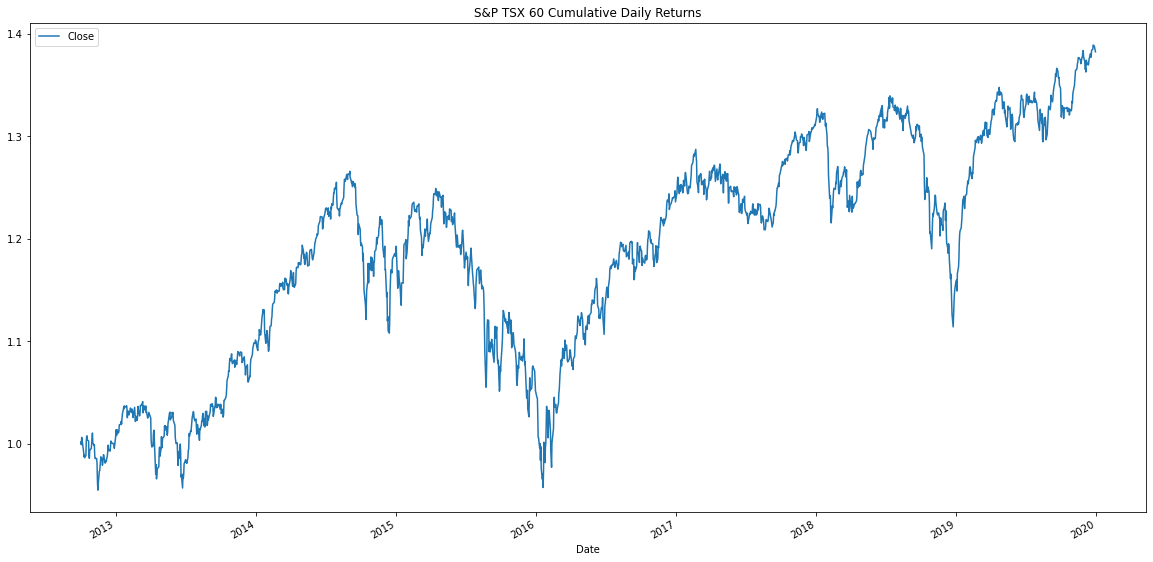

In [205]:
#Set initial investment
sp_tsx_initial_inv = 10000

#Use the 'cumprod' function to calculate the S&P TSX 60 cumulative retruns
sp_tsx_cumulative_returns = (1 + daily_returns_sp_tsx).cumprod()
sp_tsx_cumulative_returns.plot(figsize=(20,10), title="S&P TSX 60 Cumulative Daily Returns")

### Calculate and Plot Cumulative Returns for All Portfolios

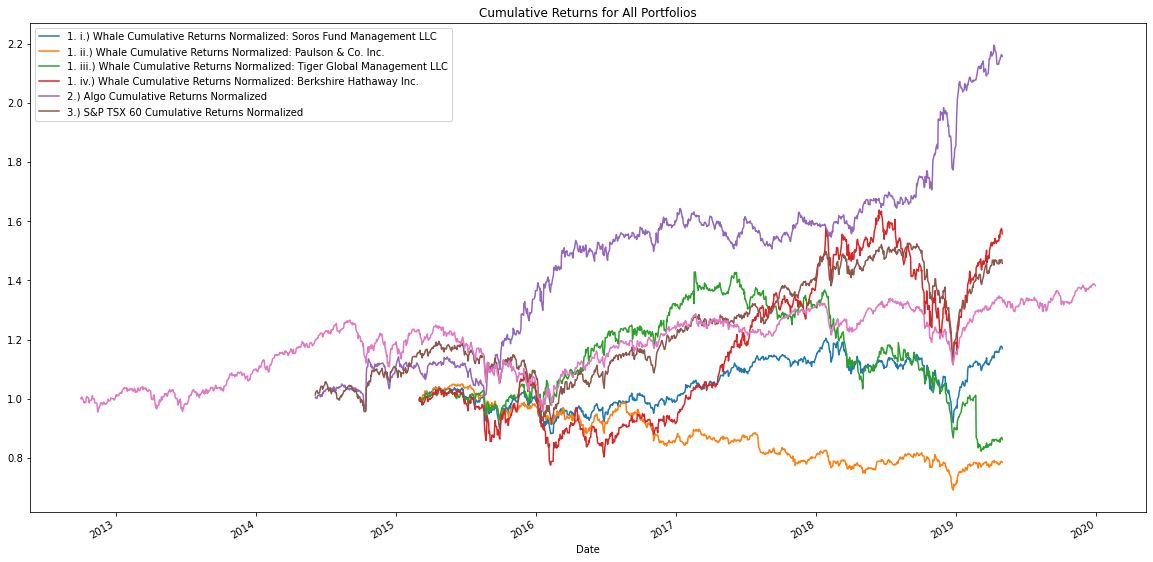

In [208]:
# Set the figure of the chart and plot each trend on the single figure
ax = whale_cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns for All Portfolios")
algo_cumulative_returns.plot(ax=ax)
sp_tsx_cumulative_returns.plot(ax=ax)

ax.legend(['1. i.) Whale Cumulative Returns Normalized: Soros Fund Management LLC',
           '1. ii.) Whale Cumulative Returns Normalized: Paulson & Co. Inc.',
           '1. iii.) Whale Cumulative Returns Normalized: Tiger Global Management LLC',
           '1. iv.) Whale Cumulative Returns Normalized: Berkshire Hathaway Inc.',
           '2.) Algo Cumulative Returns Normalized', 
           '3.) S&P TSX 60 Cumulative Returns Normalized'])

### Portfolios Quantitatively Outperforming the S&P TSX 60:
#### It appears there are two portfolios currently outperforming the S&P index: i.) Berkshire Hathaway and ii.) Algo Portfolio. 